<hr>

# Initial Set-up 


<hr>

In [1]:
# Manually adding the parent directory to Root of the project
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Setting SQL password login to be at root
import dotenv
dotenv.load_dotenv("../.env.secrets")

# Importing Python Functions
from axym_pytools import *

# IMporting and Activating SNEE Styles
from SNEEstylepython import *
mpl_style()
plotly_style()

# Show all colummns in dataframe and  not (...) in between
pd.set_option('display.max_columns', None)

<hr>

# Running SQL's and Loading the datasets

<hr>

In [2]:
SQL_PATH = '../SQL/example.sql'
PATH_TO_SAVE_DATA = '../Data/my_data.csv'  # You can even save it as xlsx/parquet etc

# Establishing connection
CONNECTION_TO_DB = create_axym_sql_engine()

# Execute query and load Dataset (change the path to sql query and file whichever data you want)
df_from_sql = load_data_try_csv_first(CONNECTION_TO_DB, PATH_TO_SAVE_DATA, SQL_PATH)

df_from_sql.tail()

c:\Users\Ibrahim.Khan\Documents\Repos\python_project_template_simple\.venv\Lib\site-packages\axym_pytools\src\sql.py:72: SAWarning: No driver name specified; this is expected by PyODBC when using DSN-less connections
  sql_engine:Engine = create_engine(


,NHSNumber,RefDateFrom,RefDateTo,Age,AgeBand15yrs,AgeBand5yrs,BuildDate,BuildID,DeregistrationDate,EthnicCategoryCode,EthnicCategoryDescription,EthnicCategoryRecordDate,EthnicCategorySixDescription,EthnicCategorySource,ICBCode,ICBName,IMD19Centile,IMD19Decile,IMD19Quintile,IMD19Rank,Lsoa11Code,Lsoa11Name,Lsoa21Code,Lsoa21Name,ModelVersion,PCNName,PersonSource,PracticeCode,PracticeName,RegistrationDate,RegistrationStatus,RUC11,RUC11Code,Rural,Sex,SubIcbCode,SubIcbName,Urban,WardOfResidence
995,10191698952,2019-03-01,2019-03-31,82,75-89,80-84,2024-01-29 13:39:10.877,4083bd42-ac6a-446a-8fe2-bcead7681341,None,None,None,None,Unknown/anything else,None,QJG,NHS Suffolk and North East Essex Integrated Ca...,83,9,5,27086,E01033450,Suffolk Coastal 013G,E01033450,East Suffolk 028E,v0.84,EAST SUFFOLK PCN,PDS,D83048,GROVE MEDICAL CENTRE,2007-09-26,R,Urban city and town,C1,False,Male,06L,Ipswich and East Suffolk,True,E05012741
996,10191458167,2020-06-01,2020-06-30,83,75-89,80-84,2024-01-29 17:43:49.600,99b6ec12-4f13-488f-9a2b-9cd4277eefc0,None,None,None,None,Unknown/anything else,None,QJG,NHS Suffolk and North East Essex Integrated Ca...,83,9,5,27086,E01033450,Suffolk Coastal 013G,E01033450,East Suffolk 028E,v0.84,EAST SUFFOLK PCN,PDS,D83048,GROVE MEDICAL CENTRE,2007-09-26,R,Urban city and town,C1,False,Male,06L,Ipswich and East Suffolk,True,E05012741
997,10189560119,2018-05-01,2018-05-31,80,75-89,80-84,2024-01-29 11:22:52.390,c8ac9f89-2d4e-414d-a985-919fbeb54e8e,None,None,None,None,Unknown/anything else,None,QJG,NHS Suffolk and North East Essex Integrated Ca...,83,9,5,27086,E01033450,Suffolk Coastal 013G,E01033450,East Suffolk 028E,v0.84,EAST SUFFOLK PCN,PDS,D83048,GROVE MEDICAL CENTRE,2007-09-26,R,Urban city and town,C1,False,Male,06L,Ipswich and East Suffolk,True,E05012741
998,10191458167,2018-06-01,2018-06-30,81,75-89,80-84,2024-01-29 11:35:37.280,71e9b546-8789-4b1b-90e6-d22a5793b1ae,None,None,None,None,Unknown/anything else,None,QJG,NHS Suffolk and North East Essex Integrated Ca...,83,9,5,27086,E01033450,Suffolk Coastal 013G,E01033450,East Suffolk 028E,v0.84,EAST SUFFOLK PCN,PDS,D83048,GROVE MEDICAL CENTRE,2007-09-26,R,Urban city and town,C1,False,Male,06L,Ipswich and East Suffolk,True,E05012741
999,10189550914,2018-05-01,2018-05-31,83,75-89,80-84,2024-01-29 11:22:52.390,c8ac9f89-2d4e-414d-a985-919fbeb54e8e,None,None,None,None,Unknown/anything else,None,QJG,NHS Suffolk and North East Essex Integrated Ca...,83,9,5,27086,E01033450,Suffolk Coastal 013G,E01033450,East Suffolk 028E,v0.84,EAST SUFFOLK PCN,PDS,D83048,GROVE MEDICAL CENTRE,2007-09-26,R,Urban city and town,C1,False,Male,06L,Ipswich and East Suffolk,True,E05012741


In [3]:
df_from_data_file = pd.read_excel("../Data/GP_lookup.xlsx")
df_from_data_file

,GPPractice_Code,PCN,GPPractice_Name,Registered_INT,Registered_SubAlliance,Population_REF,Population_09_25
0,D83024,BARRACK LANE & IVRY STREET,IVRY STREET MEDICAL PRACTICE,Ipswich West,Ipswich & East Suffolk,13193,13953.0
1,D83059,BARRACK LANE & IVRY STREET,BARRACK LANE MEDICAL CENTRE,Ipswich West,Ipswich & East Suffolk,20463,21663.0
2,D83049,DEBEN HEALTH GROUP,LITTLE ST JOHN STREET SURGERY,Woodbridge,Ipswich & East Suffolk,7041,6904.0
3,D83054,DEBEN HEALTH GROUP,THE PENINSULA PRACTICE,Woodbridge,Ipswich & East Suffolk,6732,6875.0
4,D83057,DEBEN HEALTH GROUP,FRAMFIELD HOUSE SURGERY,Woodbridge,Ipswich & East Suffolk,14092,14482.0
...,...,...,...,...,...,...,...
86,D83075,SUDBURY,SIAM SURGERY,Sudbury,West Suffolk,11561,13020.0
87,D83003,WEST SUFFOLK RURAL,WICKHAMBROOK SURGERY,Haverhill,West Suffolk,5220,5080.0
88,D83076,WEST SUFFOLK RURAL,CLARE GUILDHALL SURGERY,Haverhill,West Suffolk,5330,5535.0
89,D83014,WEST SUFFOLK RURAL,THE LONG MELFORD PRIMARY CARE,Sudbury,West Suffolk,8874,NaN


<hr>

# Example plots

<hr>

## 1. Matplotlib (Very flexible, static but more manual styling needed)

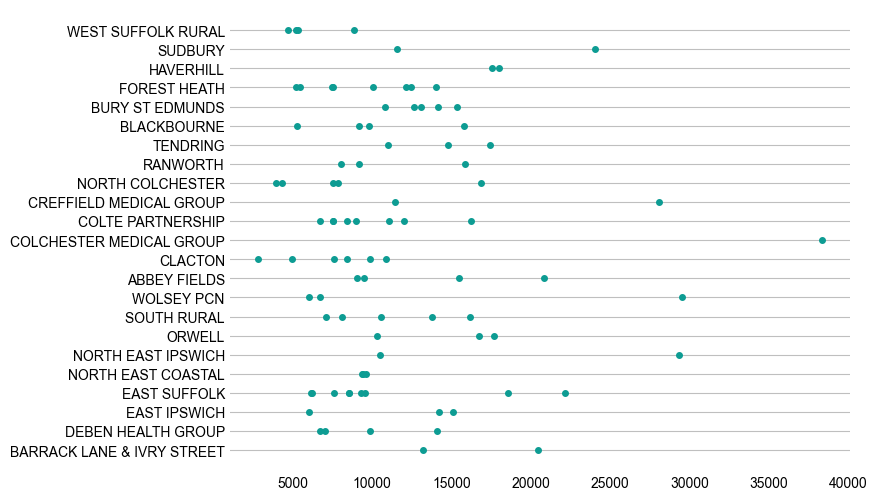

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_from_data_file['Population_REF'], df_from_data_file['PCN'])

## 2. Seaborn (Static and auto-styled, less control over low level details)

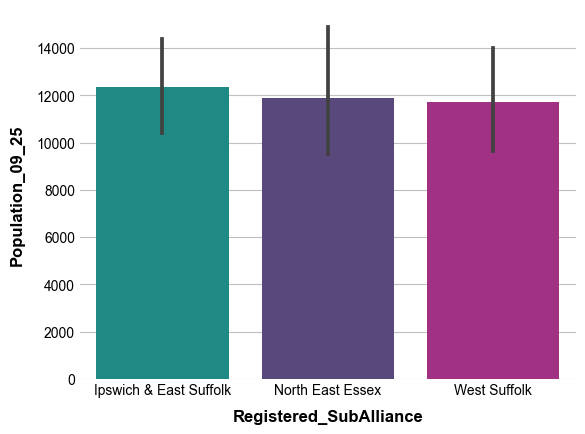

In [34]:
import seaborn as sns

sns.barplot(data=df_from_data_file ,x=df_from_data_file['Registered_SubAlliance'], y=df_from_data_file['Population_09_25'])
plt.show()


## 3. Plotly (Interactive, auto styled and heavier library)

In [ ]:
import plotly.express as px

fig = px.sunburst(
    df_from_data_file,
    path = ['Registered_SubAlliance','PCN'],
    values = 'Population_09_25',
    color = 'Registered_SubAlliance'
)
fig.update_layout(
    title = 'Count of registered population',
    width=1000,
    height=800,
)
fig.update_traces(
    hovertemplate =
        '<b>%{label}<br>%{value}</b> Patients'
        '<br><b>%{percentParent:.1%}</b> of %{parent}'
        '<br><b>%{percentRoot:.1%}</b> of SNEE'
)
fig.show()